# **Importing Libraries**

In [ ]:
import cv2 as cv
import numpy as np 
from matplotlib import pyplot as plt 
from PIL import Image

# 1. Histogram processing

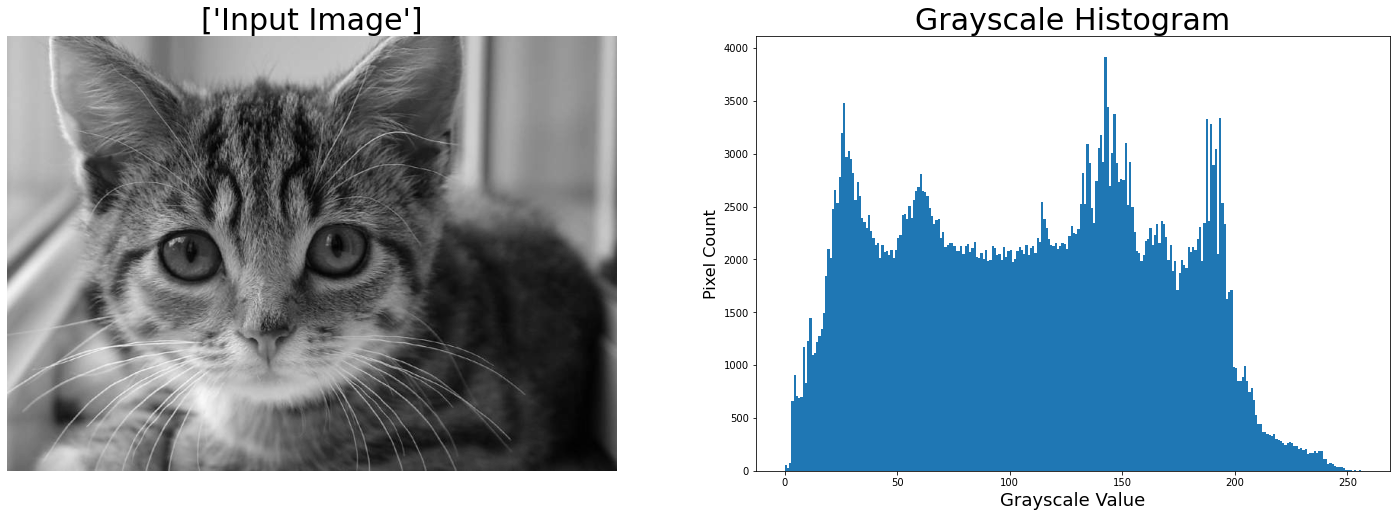

In [ ]:
img = cv.imread('cat.jpg',0) 

f = plt.figure(figsize=(25, 8))
f.add_subplot(1, 2, 1)
plt.title(['Input Image'], fontsize=30)
plt.imshow(img, cmap='gray')
plt.axis('off')
f.add_subplot(1, 2, 2)
plt.title('Grayscale Histogram', fontsize=30)
plt.xlabel('Grayscale Value', fontsize=18)
plt.ylabel('Pixel Count', fontsize=16)
plt.hist(img.ravel(),256,[0,256])         #plt.hist(n_img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k') #calculating histogram
#numpy.ravel() functions returns contiguous flattened array(1D array with all the input-array elements and with the same type as it)
plt.show()
plt.show(block=True)

# 2. Histogram equalization

<BarContainer object of 256 artists>

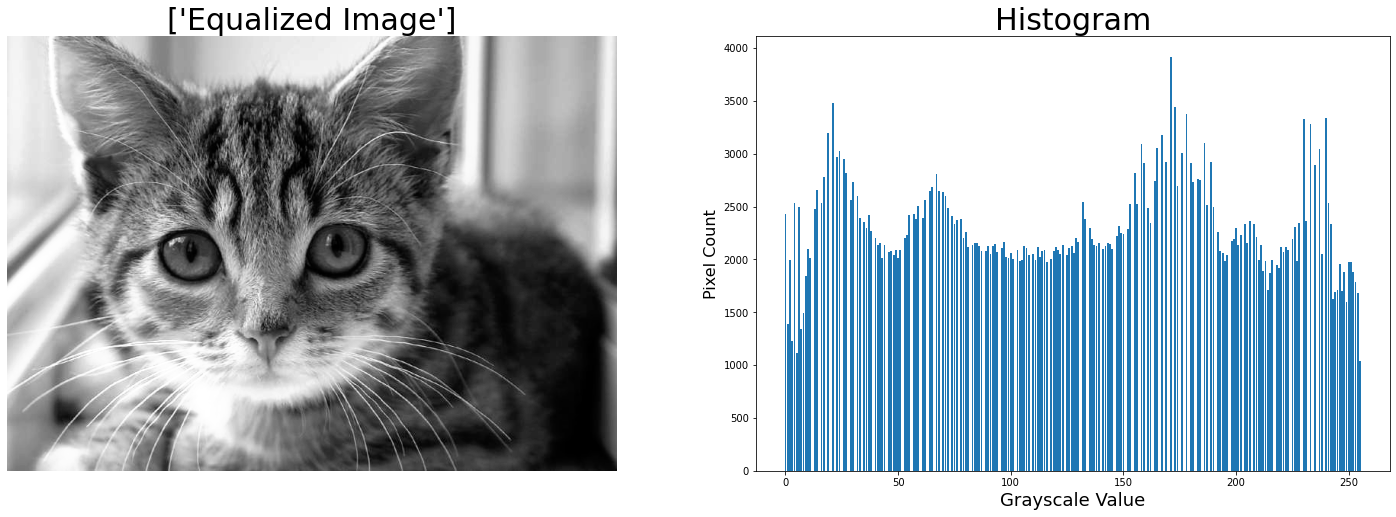

In [ ]:
img = cv.imread('cat.jpg', 0) 

img_a = np.array(img).flatten()
m, n = img.shape
histogram = np.zeros(256, dtype=int)
for i in range(img_a.size):
    histogram[img_a[i]] += 1

cumsum = np.zeros(256, dtype=int)
cumsum[0] = histogram[0]
for i in range(1, histogram.size):
   cumsum[i] = cumsum[i-1] + histogram[i]

mapping = np.zeros(256, dtype=int)
grey_levels = 256
for i in range(grey_levels):
   mapping[i] = max(0, round((grey_levels * cumsum[i]) / (m * n)) - 1)

new_image = np.zeros(img.size, dtype=int)
for i in range(img_a.size):
   new_image[i] = mapping[img_a[i]]

new_histogram = np.zeros(256, dtype=int)
for i in range(img.size):
   new_histogram[new_image[i]] += 1

output_image = Image.fromarray(np.uint8(new_image.reshape((m, n))))
x_axis = np.arange(256)

f = plt.figure(figsize=(25, 8))

f.add_subplot(1, 2, 1)
plt.title(['Equalized Image'], fontsize=30)
plt.imshow(output_image, cmap='gray')
plt.axis('off')
f.add_subplot(1, 2, 2)
plt.title('Histogram', fontsize=30)
plt.xlabel('Grayscale Value', fontsize=18)
plt.ylabel('Pixel Count', fontsize=16)
plt.bar(x_axis, new_histogram)